# G2M insight for Cab Investment firm - Exploratory Data Analysis

## by Roger Burek-Bors - February 20, 2021 - Warsaw, Poland 

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
%matplotlib inline
print("Libraries loaded")

Libraries loaded


In [2]:
# Building dataframes
cities = pd.read_csv('City.csv')
cabs = pd.read_csv('Cab_Data2.csv', sep=';')
customers = pd.read_csv('Customer_ID.csv')
transactions = pd.read_csv('Transaction_ID.csv')
print("Data loaded")

Data loaded


In [3]:
# Checking data format and size
print(cities.head())
print("Size of 'Cities':", cities.shape)
print()
print(cabs.head())
print("Size of 'Cabs':", cabs.shape)
print()
print(customers.head())
print("Size of 'Customers':", customers.shape)
print()
print(transactions.head())
print("Size of 'Transactions':", transactions.shape)

             City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247
Size of 'Cities': (20, 3)

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
Size of 'Cabs': (359392, 7)

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28            

In [4]:
# Describing data
print(cities.dtypes)
print()
print(cabs.dtypes)
print()
print(customers.dtypes)
print()
print(transactions.dtypes)

City          object
Population     int64
Users          int64
dtype: object

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


In [5]:
# Checking for missing data
print(cities.isna().sum())
print()
print(cabs.isna().sum())
print()
print(customers.isna().sum())
print()
print(transactions.isna().sum())

City          0
Population    0
Users         0
dtype: int64

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There is no missing data (NaN)

In [6]:
# Checking for duplicate values
print(cities['City'].is_unique)
print()
print(cabs['Transaction ID'].is_unique)
print()
print(customers['Customer ID'].is_unique)
print()
print(transactions['Transaction ID'].is_unique)

True

True

True

True


There is no duplication in data

In [7]:
colors = ['r', 'y']

### Hypothesis no. 1: bigger cities have more cab users

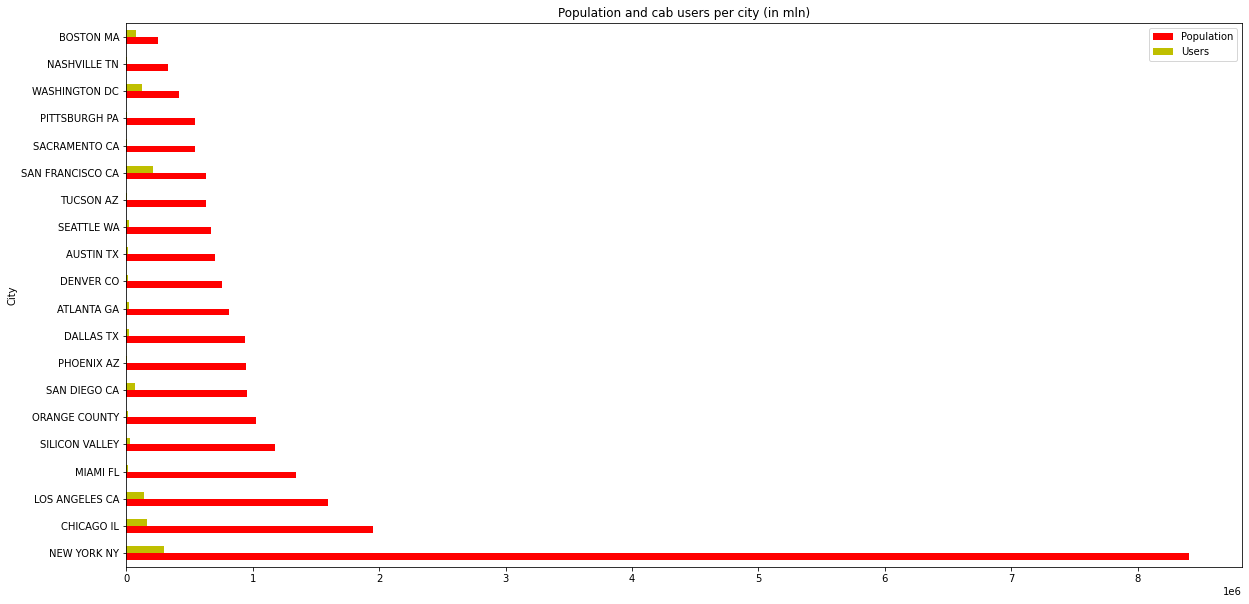

In [8]:
cities.plot.barh(x='City', figsize=(20,10), color = colors, title='Population and cab users per city (in mln)')

In [9]:
cities['Users_100k'] = cities['Users'] * 100000 / cities['Population']

In [10]:
cities.sort_values(by=['Users'], ascending=False)

,City,Population,Users,Users_100k
0,NEW YORK NY,8405837,302149,3594.514145
14,SAN FRANCISCO CA,629591,213609,33928.216890
1,CHICAGO IL,1955130,164468,8412.126048
2,LOS ANGELES CA,1595037,144132,9036.279409
17,WASHINGTON DC,418859,127001,30320.704581
19,BOSTON MA,248968,80021,32141.078372
6,SAN DIEGO CA,959307,69995,7296.412931
4,SILICON VALLEY,1177609,27247,2313.756094
12,SEATTLE WA,671238,25063,3733.847011
9,ATLANTA GA,814885,24701,3031.225265


In [11]:
cities.sort_values(by=['Users_100k'], ascending=False)

,City,Population,Users,Users_100k
14,SAN FRANCISCO CA,629591,213609,33928.216890
19,BOSTON MA,248968,80021,32141.078372
17,WASHINGTON DC,418859,127001,30320.704581
2,LOS ANGELES CA,1595037,144132,9036.279409
1,CHICAGO IL,1955130,164468,8412.126048
6,SAN DIEGO CA,959307,69995,7296.412931
12,SEATTLE WA,671238,25063,3733.847011
0,NEW YORK NY,8405837,302149,3594.514145
9,ATLANTA GA,814885,24701,3031.225265
18,NASHVILLE TN,327225,9270,2832.913133


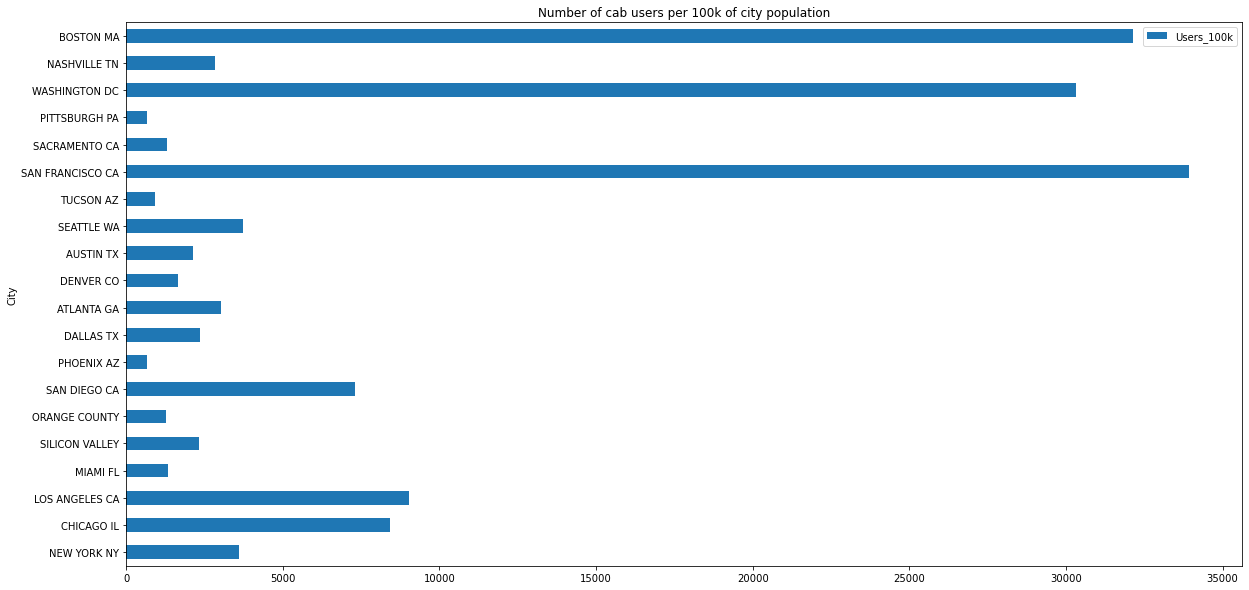

In [12]:
cities.plot.barh(x='City', y='Users_100k', figsize=(20,10), title='Number of cab users per 100k of city population')

Thesis no 1: size of the city does not determine quantity of cab users. 
There are cities like San Francisco, Boston or Washington D.C. to have more cab users per 100k citizens than much bigger cities.

### Hypothesis no. 2: bigger cities provide more profit and equal opportunities to cab companies

In [13]:
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [14]:
cabs2 = cabs.drop(['Transaction ID', 'Date of Travel'], axis=1)
cabs2.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip
0,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
# Calculating a global mean cost per 1 km for both companies
cabs2['Cost per 1km'] = cabs2['Cost of Trip'] / cabs2['KM Travelled'] 
cabs2.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3
1,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7
2,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8
3,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6
4,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2


In [16]:
# Size of market in particular city
cabs3 = cabs2.drop(['Cost of Trip', 'Cost per 1km'], axis=1)
cabs3 = cabs3.groupby(['City']).sum()
cabs3 = cabs3.sort_values(by=['Price Charged'])
cabs3

,KM Travelled,Price Charged
City,,
PITTSBURGH PA,29705.76,442538.64
TUCSON AZ,43229.81,672580.26
PHOENIX AZ,45825.08,756682.64
SACRAMENTO CA,53861.20,761611.95
NASHVILLE TN,68324.74,959108.13
DENVER CO,85869.75,1462531.51
ORANGE COUNTY,88826.69,1554873.21
AUSTIN TX,109207.30,1877142.50
MIAMI FL,145418.17,2580135.20


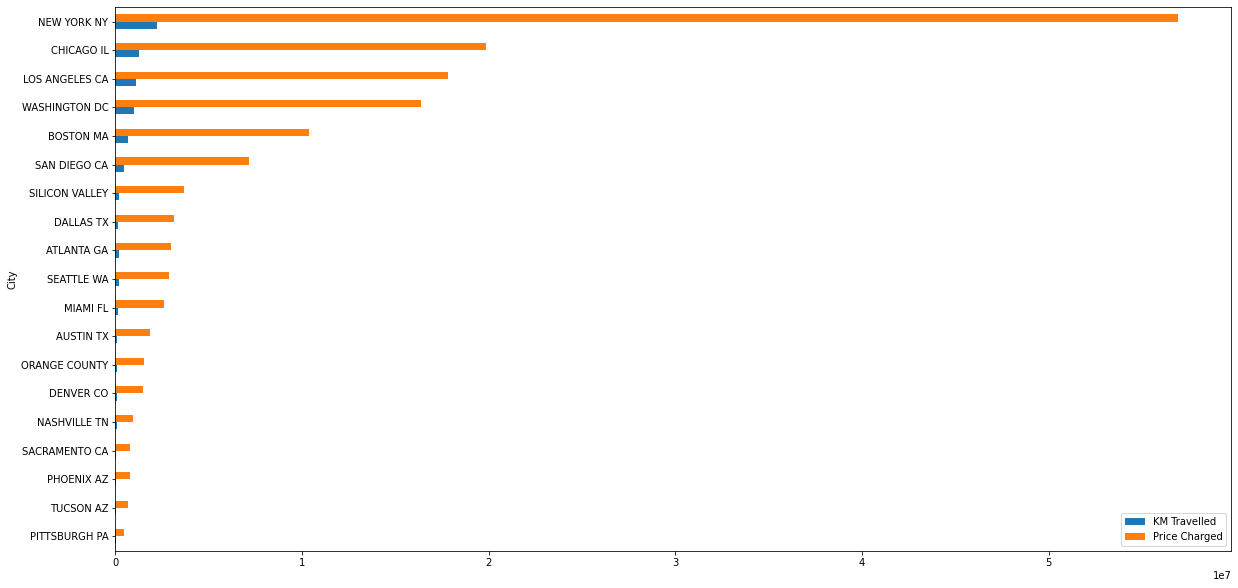

In [17]:
cabs3.plot.barh(figsize=(20,10))

In [18]:
# Competition in particular city
cabs4 = cabs2.drop(['Cost of Trip', 'Cost per 1km'], axis=1)
cabs4 = cabs4.groupby(['City', 'Company']).sum()
cabs3 = cabs4.sort_values(by=['Price Charged'])
cabs4

KM Travelled  Price Charged
City           Company                                
ATLANTA GA     Pink Cab        39715.17      532355.80
               Yellow Cab     128928.59     2447885.92
AUSTIN TX      Pink Cab        41038.42      598572.71
               Yellow Cab      68168.88     1278569.79
BOSTON MA      Pink Cab       117933.51     1558660.02
               Yellow Cab     552454.67     8801095.40
CHICAGO IL     Pink Cab       210726.13     2636186.14
               Yellow Cab    1070978.26    17205132.38
DALLAS TX      Pink Cab        30389.26      358835.40
               Yellow Cab     127392.79     2783594.51
DENVER CO      Pink Cab        31308.15      385026.22
               Yellow Cab      54561.60     1077505.29
LOS ANGELES CA Pink Cab       449656.77     6071225.76
               Yellow Cab     639078.88    11724398.65
MIAMI FL       Pink Cab        44644.45      652664.63
               Yellow Cab     100773.72     1927470.57
NASHVILLE TN   Pink Cab        41474.17      519277.05
               Yellow Cab      26850.57      439831.08
NEW YORK NY    Pink Cab       315967.27     4987254.36
               Yellow Cab    1932842.47    51966807.31
ORANGE COUNTY  Pink Cab        33608.50      472096.66
               Yellow Cab      55218.19     1082776.55
PHOENIX AZ     Pink Cab        18789.74      242197.74
               Yellow Cab      27035.34      514484.90
PITTSBURGH PA  Pink Cab        15400.66      186785.72
               Yellow Cab      14305.10      255752.92
SACRAMENTO CA  Pink Cab        30154.14      387007.82
               Yellow Cab      23707.06      374604.13
SAN DIEGO CA   Pink Cab       240703.87     3286316.40
               Yellow Cab     219799.82     3850064.19
SEATTLE WA     Pink Cab        62000.37      795623.69
               Yellow Cab     118903.62     2058692.57
SILICON VALLEY Pink Cab        86540.61     1292411.50
               Yellow Cab     107172.36     2391690.65
TUCSON AZ      Pink Cab        18022.97      258247.63
               Yellow Cab      25206.84      414332.63
WASHINGTON DC  Pink Cab        82998.95     1107506.08
               Yellow Cab     906038.71    15259197.75

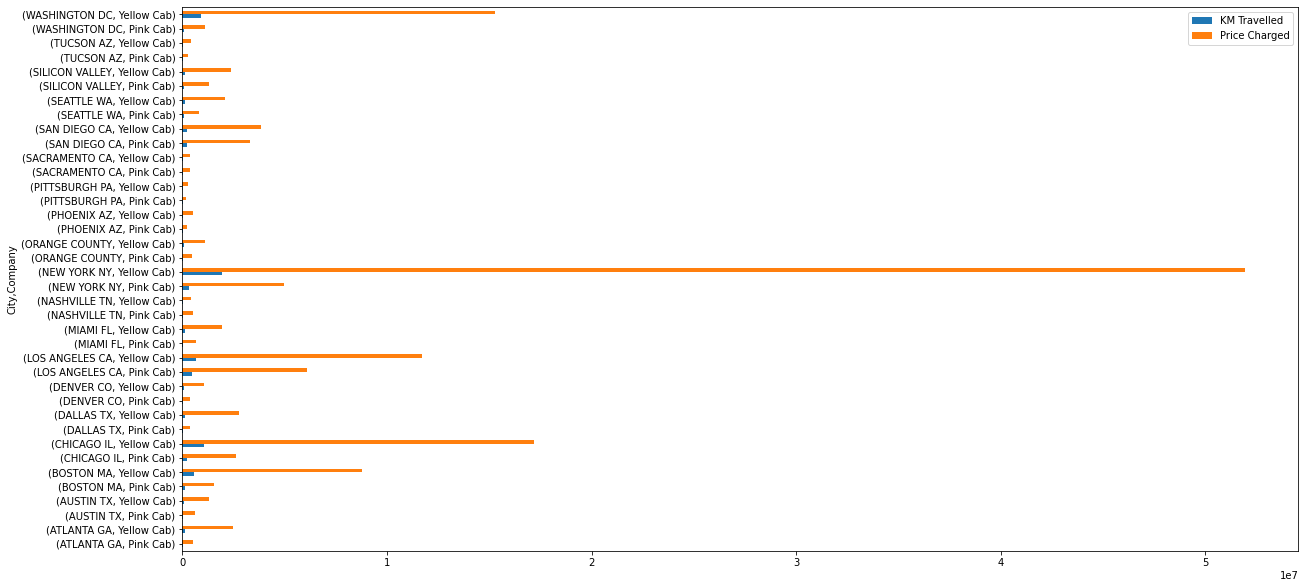

In [19]:
cabs4.plot.barh(figsize=(20,10))

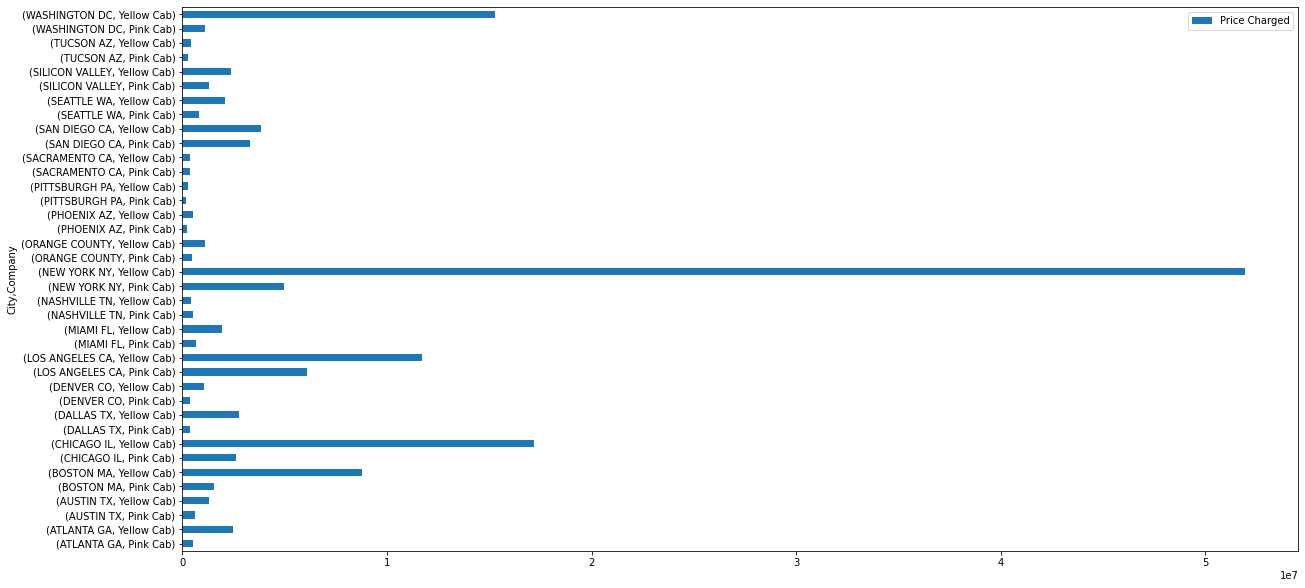

In [20]:
cabs4a = cabs4.drop(['KM Travelled'], axis=1)
cabs4a.plot.barh(figsize=(20,10))

In [42]:
cabs2['Price Charged'].sum()

152182138.52000004

In [44]:
cabs2a = cabs2.loc[cabs2['Company'] == 'Yellow Cab']
cabs2a['Price Charged'].sum()

125853887.18999997

In [45]:
cabs2b = cabs2.loc[cabs2['Company'] == 'Pink Cab']
cabs2b['Price Charged'].sum()

26328251.330000002

Thesis no. 2: big cities provide in general bigger cab market however Washington D.C. and Boston are very similar to much bigger Chicago or Los Angeles in terms of cab market. Smaller cities usueally provide better level playing field for cab companies. New York and Chicago are dominated by one cab company. Yellow cab has stronger presence in majorty of cities.

### Hypothesis no. 3: costs for cab companies are lower in big cities

In [21]:
# Calculating a global mean cost picture for both companies
cabs.groupby(['Company'])['Cost of Trip'].mean()

Company
Pink Cab      248.148682
Yellow Cab    297.922004
Name: Cost of Trip, dtype: float64

In [46]:
# Calculating a global mean income picture for both companies
cabs.groupby(['Company'])['Price Charged'].mean()

Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64

In [22]:
# Calculating a global mean cost per 1 km for both companies
cost_per_km = cabs
cost_per_km['Cost per 1km'] = cost_per_km['Cost of Trip'] / cost_per_km['KM Travelled'] 
cost_per_km.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2


In [23]:
cost_per_km.groupby(['Company'])['Cost per 1km'].mean()

Company
Pink Cab      10.998602
Yellow Cab    13.200565
Name: Cost per 1km, dtype: float64

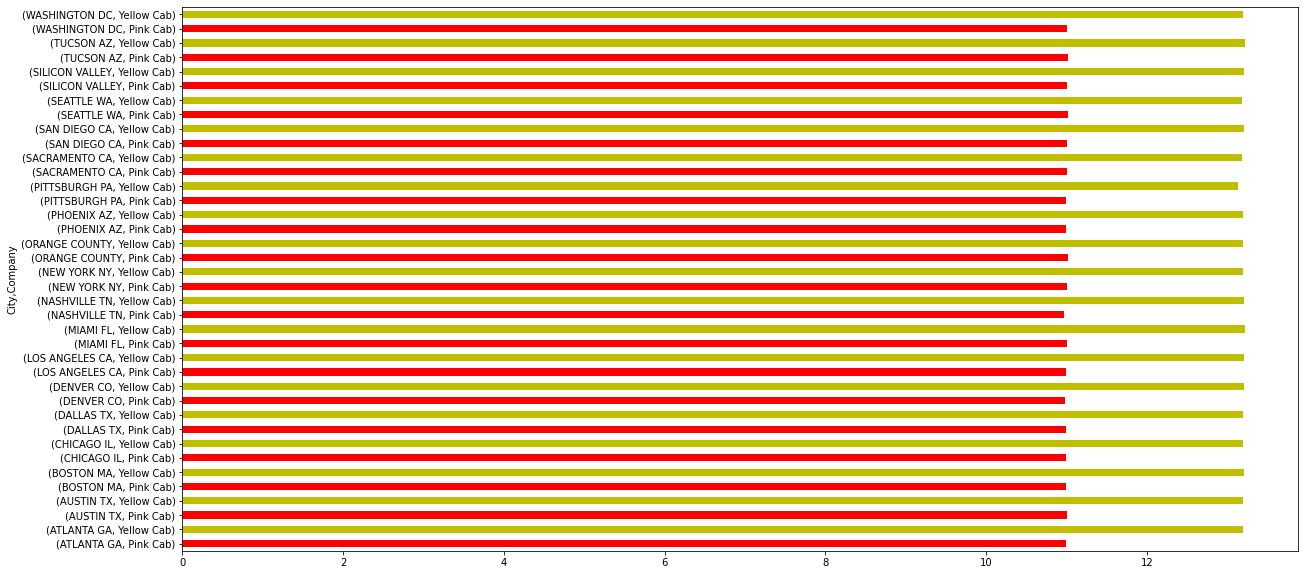

In [24]:
# Calculating a cost per 1 km in particular cities
cost_per_km.groupby(['City', 'Company'])['Cost per 1km'].mean().plot.barh(x='City', figsize=(20,10), color = colors)

Thesis no. 3: Size of city has no impact on cab costs. Pink cabs have lower mean global cost and cost per 1km of ride.

### Hypothesis no. 4: drivers in smaller cities have shorter rides than in bigger ones

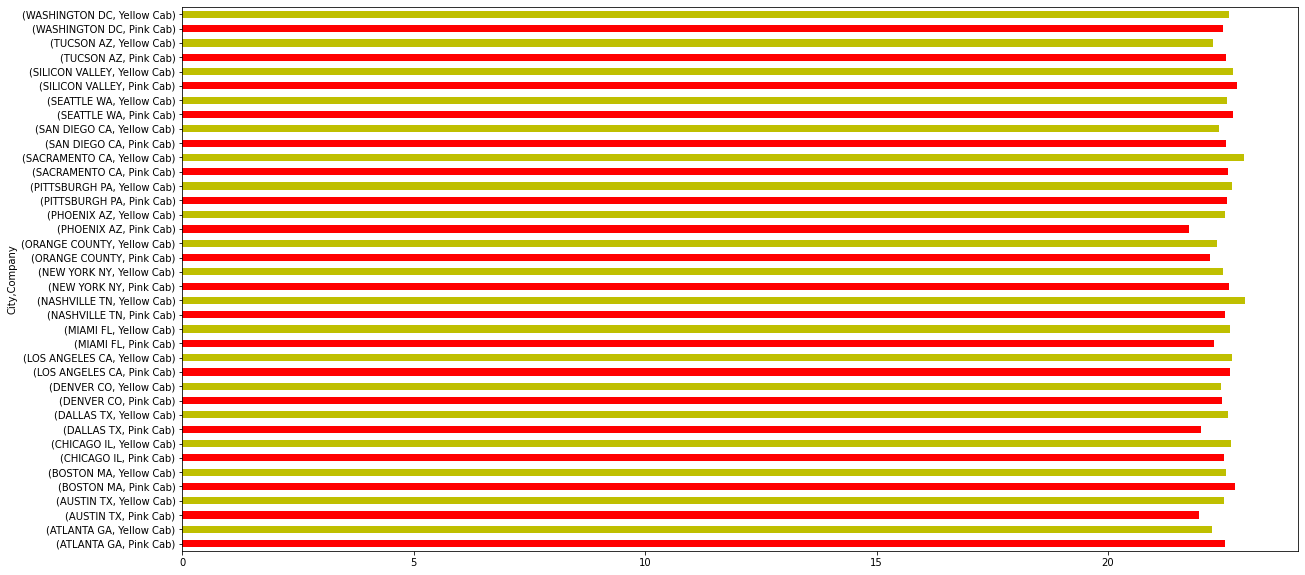

In [25]:
# Calculating a mean ride distance for each city and cab company
cost_per_km.groupby(['City', 'Company'])['KM Travelled'].mean().plot.barh(x='City', figsize=(20,10), color = colors)

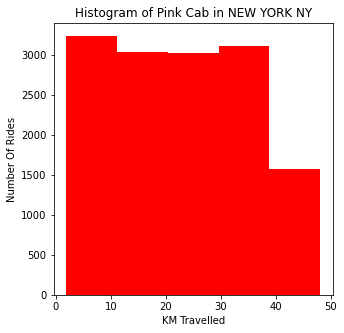

In [58]:
# To support above, generating histograms for each company
company = ['Pink Cab']
# ['Yellow Cab', 'Pink Cab']
city = ['NEW YORK NY']
# ['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL', 'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA',
#        'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA',
#        'SACRAMENTO CA', 'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA']
for i in company:
    cost_per_comp = cost_per_km.loc[cost_per_km['Company'] == i]
    for j in city:
        cost_per_comp = cost_per_comp.loc[cost_per_km['City'] == j]
        cost_per_comp['KM Travelled'].plot(kind='hist',
                                           bins=5,
                                           title=f'Histogram of {i} in {j}',
                                           figsize=(5,5),
                                           color=colors)
        plt.xlabel('KM Travelled')
        plt.ylabel("Number Of Rides")

### Hypothesis no. 5: customers like to pay by cash

In [27]:
# How customer pays for service (number of transactions in global)?
card_or_cash1 = transactions['Payment_Mode'].value_counts()
card_or_cash1

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

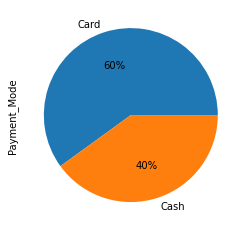

In [28]:
card_or_cash1.plot.pie(autopct='%.0f%%')

In [29]:
# What brings more revenue - cash or card payments?
cabs5 = cabs[['Transaction ID', 'Price Charged']]
# Merging 2 dataframes - "Cabs" and "Transactions"
transactions2 = transactions.merge(cabs5, on='Transaction ID', how='left')
transactions2.head()

,Transaction ID,Customer ID,Payment_Mode,Price Charged
0,10000011,29290,Card,370.95
1,10000012,27703,Card,358.52
2,10000013,28712,Cash,125.20
3,10000014,28020,Cash,377.40
4,10000015,27182,Card,114.62


In [30]:
card_or_cash2 = transactions2.groupby(['Payment_Mode'])['Price Charged'].sum()
card_or_cash2

Payment_Mode
Card    91242784.53
Cash    60939353.99
Name: Price Charged, dtype: float64

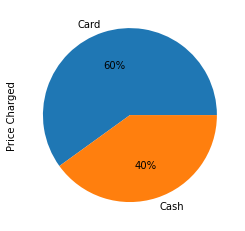

In [31]:
card_or_cash2.plot.pie(autopct='%.0f%%')

Thesis no. 5: Card payments are more frequent nowadays and constitute 60% both in terms of number of transactions and revenue.

### Hypothesis no. 6: cab market is stable business and there is no seasonality in the demand

In [76]:
# Yellow Cab long term profit analysis
yellow = cabs.loc[cabs['Company'] == 'Yellow Cab']
yellow.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,13.68
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,12.24
235,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,12.48
236,10000387,2016-01-06,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,12.48
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,12.96


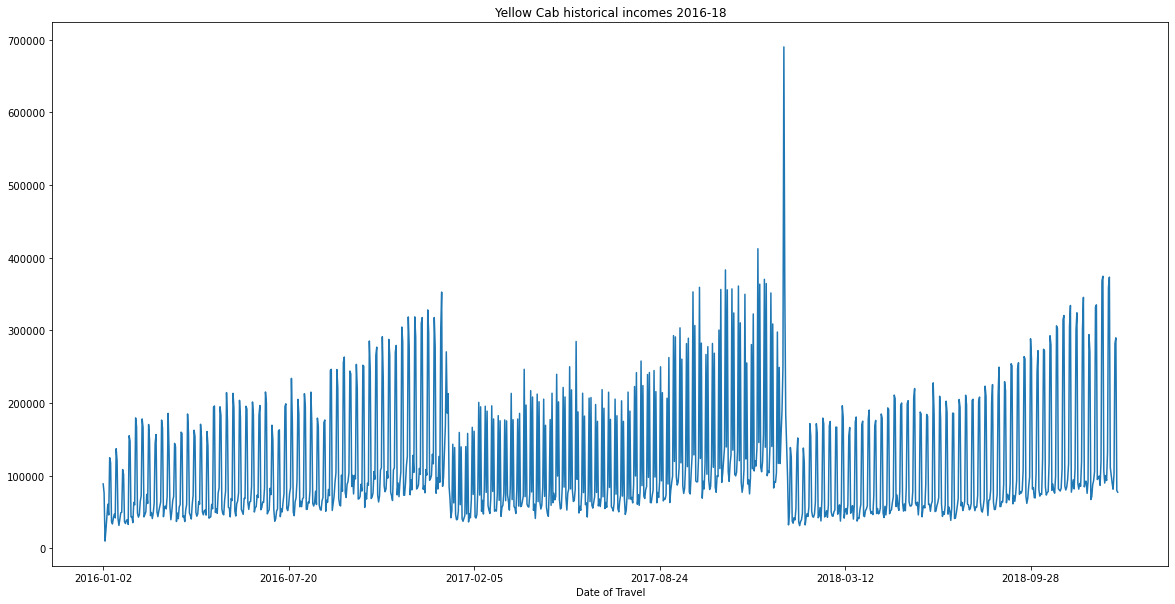

In [77]:
yellow.groupby(['Date of Travel'])['Price Charged'].sum().plot(title='Yellow Cab historical incomes 2016-18', figsize=(20,10))

In [78]:
yellow2 = yellow.sort_values('Date of Travel')

In [79]:
# Slicing data for 2016
From = '2016-01-01'
To   = '2016-12-31'
yellow2a = yellow2.loc[yellow2['Date of Travel'] <= To]

In [80]:
yellow2a['Price Charged'].sum()

38481133.17999999

In [82]:
# Slicing data for 2017
From = '2017-01-01'
To   = '2017-12-31'
yellow2b = yellow2.loc[yellow2['Date of Travel'] <= To]
yellow2b['Price Charged'].sum() - 38481133.17999999

45818910.04000001

In [83]:
# Slicing data for 2018
From = '2018-01-01'
To   = '2018-12-31'
yellow2c = yellow2.loc[yellow2['Date of Travel'] <= To]
yellow2c['Price Charged'].sum() - 38481133.17999999 - 45818910.04000001

41553843.97

In [84]:
# Pink Cab long term profit analysis
pink = cabs.loc[cabs['Company'] == 'Pink Cab']
pink.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2


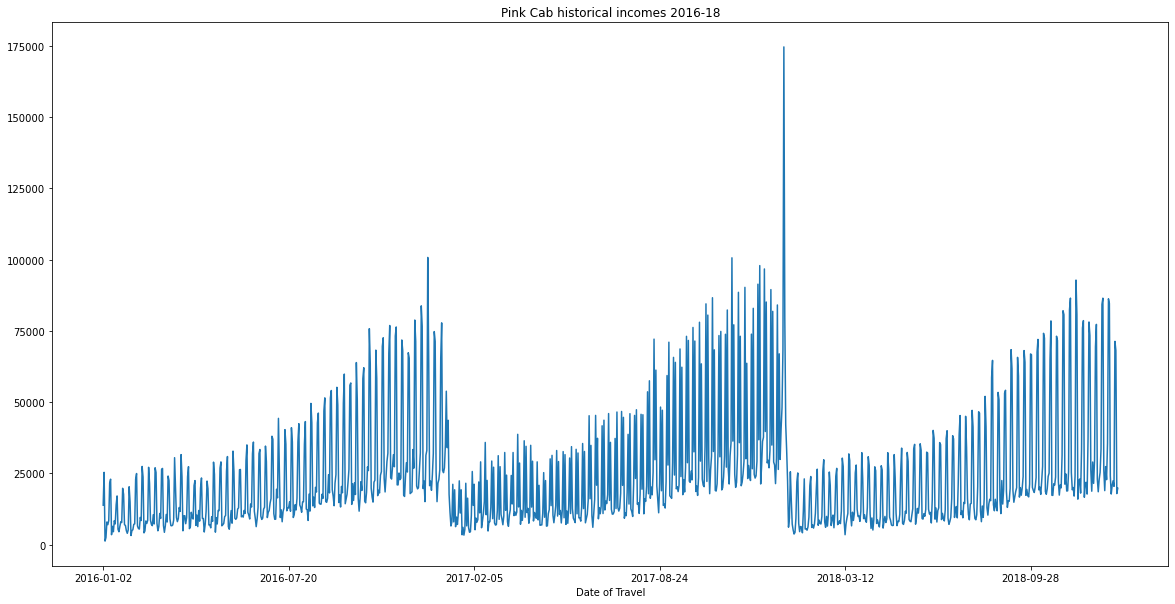

In [85]:
pink.groupby(['Date of Travel'])['Price Charged'].sum().plot(title='Pink Cab historical incomes 2016-18', figsize=(20,10))

In [86]:
pink2 = pink.sort_values('Date of Travel')

# Slicing data for 2016
From = '2016-01-01'
To   = '2016-12-31'
pink2a = pink2.loc[pink2['Date of Travel'] <= To]
pink2a['Price Charged'].sum()

7908479.230000001

In [87]:
# Slicing data for 2017
From = '2017-01-01'
To   = '2017-12-31'
pink2b = pink2.loc[pink2['Date of Travel'] <= To]
pink2b['Price Charged'].sum() - 7908479.230000001

9578629.54

In [89]:
# Slicing data for 2018
From = '2018-01-01'
To   = '2018-12-31'
pink2c = pink2.loc[pink2['Date of Travel'] <= To]
pink2c['Price Charged'].sum() - 7908479.230000001 - 9578629.54

8841142.559999999

Thesis no. 5: Both Yellow and Pink Cab companies demonstrate similar annual trends with biggest demand in Autumn and Winter and indeed there is seasonality in weekly and seasonly demand.

### Joint dataframe for further modeling

In [36]:
jointDF = cost_per_km.merge(transactions, on='Transaction ID', how='left')
jointDF.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2,27182,Card


In [37]:
jointDF = jointDF.merge(customers, on='Customer ID', how='left')
jointDF.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10.3,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,11.7,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10.8,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10.6,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,11.2,27182,Card,Male,33,8536


In [38]:
jointDF.shape

(359392, 13)

In [39]:
jointDF.sort_values(by=['Date of Travel'])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Cost per 1km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
1030,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,13.32,52536,Card,Male,24,10606
489,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,13.44,4844,Cash,Male,32,5548
484,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,13.44,5671,Cash,Male,24,7081
850,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,12.72,2761,Card,Male,40,11462
160,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,10.30,20687,Cash,Male,39,8926
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355489,10435011,2018-12-31,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,14.16,10967,Card,Female,63,16390
354114,10433309,2018-12-31,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,11.20,8175,Card,Male,24,12571
356365,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,13.92,45644,Card,Male,28,23014
359162,10439845,2018-12-31,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,13.32,40061,Cash,Male,25,3068


In [40]:
cities.sort_values(by=['Population'], ascending=False)

,City,Population,Users,Users_100k
0,NEW YORK NY,8405837,302149,3594.514145
1,CHICAGO IL,1955130,164468,8412.126048
2,LOS ANGELES CA,1595037,144132,9036.279409
3,MIAMI FL,1339155,17675,1319.862152
4,SILICON VALLEY,1177609,27247,2313.756094
5,ORANGE COUNTY,1030185,12994,1261.326849
6,SAN DIEGO CA,959307,69995,7296.412931
7,PHOENIX AZ,943999,6133,649.682892
8,DALLAS TX,942908,22157,2349.858099
9,ATLANTA GA,814885,24701,3031.225265


In [41]:
jointDF.to_csv('jointDF.csv')

### Recommendation for stakeholders

- To choose between particular cab company we should understand the market first. Market situation in below 5 cities should be crucial to take investment decision. NY City provides the largest and outstanding market worth more than 56 million USD in analyzed period (2016-18). Cities that provided cab market bigger than 10 million USD in analyzed period (2016-18) are:
    - Chicago IL – 20 million USD
	- Los Angeles – 18 million USD
	- Washington D.C. – 16 million USD
	- Boston MA – 10 million USD
- another important decision factor is number of users in particular city:
    - In global:
        - Boston MA – 80021
        - Washington D.C. – 127001
        - Los Angeles – 144132
        - Chicago IL – 164468
        - NY City – 302149
    - And per 100k citizens:
        - NY City – 3595
        - Chicago IL – 8412
        - Los Angeles – 9036
        - Washington D.C. – 30321
        - Boston MA – 32141
- Therefore investors should choose cab company based on data and metrics for aboce enumerated cities.
- Yellow Cab scores more than 75% market in terms of value in NY City, Chicago, Los Angeles, Washington and Boston.
- Still investors needs to come up with strategy to lower cost of operation since Pink Cab has better metrics here.
- Both companies have similar profit trends within the year and seasonality in demand which grows bigger in second part of the year.
- Investing in Yellow Can require founds for equipping cabs with card terminals since card payments are the most popular among customers.
- I would recommend to investors Yellow Cab as they can count on more return on investment.